# Exploração de dados

Nessa seção, eu explorei a natureza dos dados, como eles podem se comportar com classes separadas de forma linear, não linear, entendendo como elas funcionam e visualizando isso em gráficos. Ao final, foi realizada de forma breve uma manipulação com base no dataset Spaceship Titanic, explorando suas variáveis, a distribuição dos dados e como lidar com algumas observações com dados faltantes. Além disso, explorei também como faria para pré processar os dados visando utilizá-los como entrada em uma rede neural.

## Separação de dados em 2D

Buscando explorar dados primeiramente em apenas duas dimensões, gerei amostras de 100 observações em cada, cujas distribuições eram ditadas pelas seguintes regras:
* **Classe 0:** Mean = $[2, 3]$, Standard Deviation = $[0.8, 2.5]$
* **Classe 1:** Mean = $[5, 6]$, Standard Deviation = $[1.2, 1.9]$
* **Classe 2:** Mean = $[8, 1]$, Standard Deviation = $[0.9, 0.9]$
* **Classe 3:** Mean = $[15, 4]$, Standard Deviation = $[0.5, 2.0]$

Para isso, utilizei uma das bibliotecas mais clássicas do Python, NumPy, para gerar cada uma das classes, com a sua respectiva distribuição. Tendo em vista a replicabilidade desse estudo, eu utilizei uma *RANDOM SEED (42)*.

In [1]:
import numpy as np
RANDOM_SEED = 42
N = 100

classes = [0, 1, 2, 3]

X_mean = [2, 5, 8, 15]
Y_mean = [3, 6, 1, 4]

X_sd = [0.8, 1.2, 0.9, 0.5]
Y_sd = [2.5, 1.9, 0.9, 2.0]
label_x = []
label_y = []
label_class = []
np.random.seed(RANDOM_SEED)
for classe in classes:
    x = np.random.normal(loc=X_mean[classe], scale=X_sd[classe], size=N)
    y = np.random.normal(loc=Y_mean[classe], scale=Y_sd[classe], size=N)
    
    label_x.append(x)
    label_y.append(y)
    label_class.append([classe] * N)        

Utilizando a biblioteca Matplotlib.PyPlot para visualizar como ficaram as distribuições de cada uma das classes, podemos observar algo como.

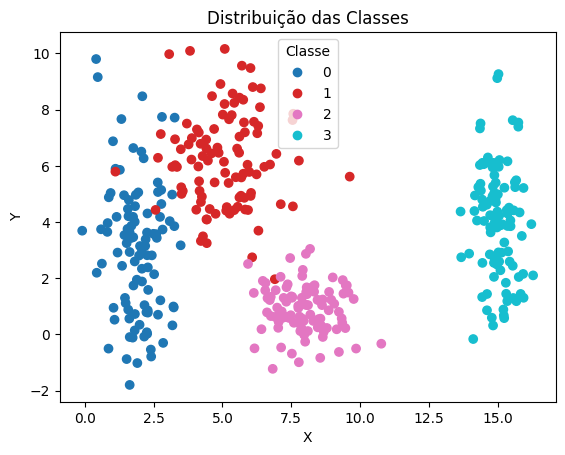

In [2]:
import matplotlib.pyplot as plt
scatter = plt.scatter(label_x, label_y, c=label_class, cmap='tab10')

plt.title('Distribuição das Classes')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(*scatter.legend_elements(), title="Classe")
plt.show()

Em geral o que podemos perceber dessos dados é que as quatro classes possuem uma distribuição compacta, exceto a classe 1 que é um pouco mais esparsa. Por exemplo, a classe 3 está claramente definida entre valores de X próximo de 15 e Y variando entre 0 e 10, se distanciando bastante das outras classes. A classe 0 também tem mais ou menos o mesmo comportamento da classe 3, porém em níveis de valor entre 2 e 2.5 de X. Já a classe 1, se apresenta como a mais distinta entre as classes, sendo mais esparsa e gerando bastante sobreposição entre seus pontos e os pontos das classes 0 e 2.

Simulando possíveis limites lineares entre os pontos, é possível dizer que algumas linhas retas poderiam separar as quatro classes. A classe 3 se apresenta facilmente como candidata a ser separada por uma única linha, que em conjunto com outra linha poderia separar a classe 2. O problema aqui mesmo, ficou nas classes 0 e 1, em que alguns pontos se sobrepuseram, causando uma dificuldade em separar as classes com apenas uma linha reta. É possível tentarmos separar com a reta, porém é bastante provável que isso gere alguns erros de classificação.

Eu desenhei algumas linhas que podem de certa forma, simular a separação das classes com resoluções lineares

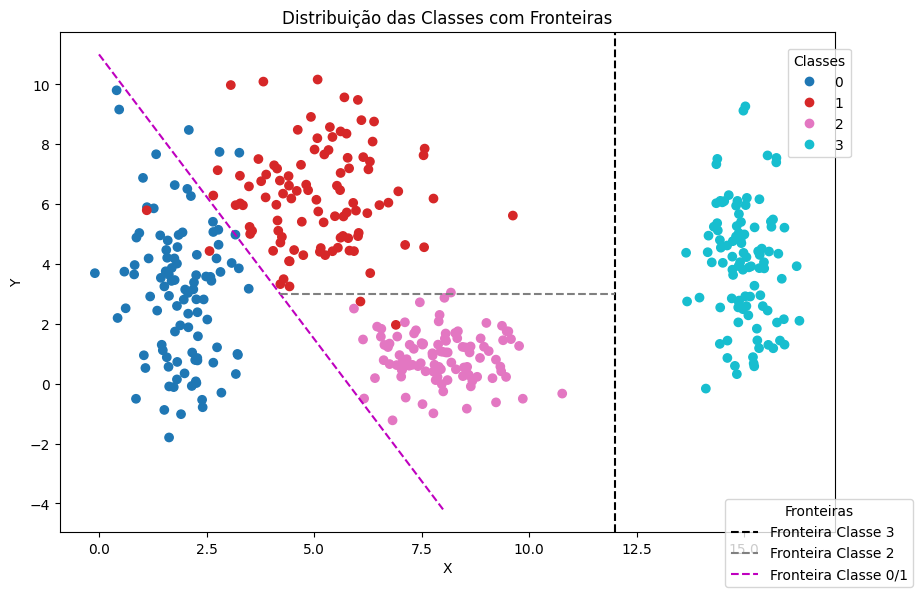

In [3]:
fig, ax = plt.subplots(figsize=(10, 6.5))

scatter = ax.scatter(label_x, label_y, c=label_class, cmap='tab10')

# x = 12
fronteira3 = ax.axvline(x=12, color='k', linestyle='--', label='Fronteira Classe 3')

# -1.9x + 11
x_vals = np.linspace(0, 8, 200)
y_vals = -1.9 * x_vals + 11
fronteira01, = ax.plot(x_vals, y_vals, 'm--', label='Fronteira Classe 0/1')

# y=3 x = [4.2, 12]
x_intersec = (11 - 3) / 1.9
x_left = max(x_intersec, 0)
x_right = 12
fronteira2, = ax.plot([x_left, x_right], [3, 3], linestyle='--', color='gray',
                      label='Fronteira Classe 2')

ax.set_title('Distribuição das Classes com Fronteiras')
ax.set_xlabel('X')
ax.set_ylabel('Y')

leg_classes = ax.legend(*scatter.legend_elements(), title="Classes",
                        loc="upper center", bbox_to_anchor=(0.98, 0.98))
ax.add_artist(leg_classes)

ax.legend(handles=[fronteira3, fronteira2, fronteira01], title="Fronteiras",
          loc="upper center", bbox_to_anchor=(0.98, 0.08))

plt.show()


## A não linearidade em mais dimensões

Agora dando um passo em direção a problemas reais, tendo que lidar com situações com mais de duas dimensões, isto é, mais de duas variáveis, nessa parte do projeto, a exploração foi a partir de classes multivariadas. Essas seguiram as seguintes distribuições:

* **Class A:**

    Mean vector:

    $$\mu_A = [0, 0, 0, 0, 0]$$

    Covariance matrix:

    $$
    \Sigma_A = \begin{pmatrix} 1.0 & 0.8 & 0.1 & 0.0 & 0.0 \\
    0.8 & 1.0 & 0.3 & 0.0 & 0.0 \\
    0.1 & 0.3 & 1.0 & 0.5 & 0.0 \\
    0.0 & 0.0 & 0.5 & 1.0 & 0.2 \\
    0.0 & 0.0 & 0.0 & 0.2 & 1.0
    \end{pmatrix}
    $$

* **Class B:**

    Mean vector:
        
    $$\mu_B = [1.5, 1.5, 1.5, 1.5, 1.5]$$
    
    Covariance matrix:

    $$
    \Sigma_B = \begin{pmatrix} 1.5 & -0.7 & 0.2 & 0.0 & 0.0 \\
    -0.7 & 1.5 & 0.4 & 0.0 & 0.0 \\
    0.2 & 0.4 & 1.5 & 0.6 & 0.0 \\
    0.0 & 0.0 & 0.6 & 1.5 & 0.3 \\
    0.0 & 0.0 & 0.0 & 0.3 & 1.5
    \end{pmatrix}
    $$

Mantendo a replicabilidade, continuamos utilizando a *RANDOM SEED (42)*, e na geração dos dados a lib NumPy.

In [4]:
import numpy as np
RANDOM_SEED = 42
N = 500
np.random.seed(RANDOM_SEED)
classes = [0, 1]

mean = [[0, 0, 0, 0, 0], [1.5, 1.5, 1.5, 1.5, 1.5]]
sigma = [
    [
        [1.0, 0.8, 0.1, 0.0, 0.0],
        [0.8, 1.0, 0.3, 0.0, 0.0],
        [0.1, 0.3, 1.0, 0.5, 0.0],
        [0.0, 0.0, 0.5, 1.0, 0.2],
        [0.0, 0.0, 0.0, 0.2, 1.0],
    ],
    [
        [1.5, -0.7, 0.2, 0.0, 0.0],
        [-0.7, 1.5, 0.4, 0.0, 0.0],
        [0.2, 0.4, 1.5, 0.6, 0.0],
        [0.0, 0.0, 0.6, 1.5, 0.3],
        [0.0, 0.0, 0.0, 0.3, 1.5],
    ],
]

label_features = []
label_class = []

for classe in classes:
    features = np.random.multivariate_normal(mean[classe], sigma[classe], size=N)

    label_features.append(features)
    label_class.append([classe] * N)

Um grande problema de trabalhar com mais dimensões, isso, principalmente quando passam de 3, é o fato de que não conseguimos mais visualizar os dados, e muitas vezes, o entendimento do dataset, que pode trazer grandes insights é a partir de gráficos. Pensando nisso, trouxe aqui uma das várias formas que podemos lidar com esse empecilho, isto é, reduzir as dimensões utilizando um método estatístico, nesse caso, escolhi utilizar o PCA (*Principal Component Analysis*). Método esse que transforma um conjunto de variáveis possivelmente correlacionadas em um novo conjunto de variáveis não correlacionadas, os principais componentes do conjunto de dados, ordenados de modo a reter a maior parte da variância e portanto da explicabilidade dos dados em menores dimensões. No caso aplicado aqui, o que estamos fazendo é transformando nossos dados que possuem atualmente 5 dimensões, para apenas 2 dimensões, possibilitando uma visualização mais clara, assim como no primeiro caso.

Um ponto importante na aplicação do PCA, é a necessidade da normalização dos dados, uma vez que o algoritmo é sensível à escala das variáveis. O PCA funciona identificando as direções de maior variância no conjunto de dados. Se uma variável estiver em uma escala muito maior que as outras (exemplo: idade $[0,100]$ e renda anual da familia $[100K, 100MM]$), a variável com maior escala ela terá uma variância numericamente maior e acabará dominando os componentes principais de forma indevida.

Quando cito normalização, estou me referenciando a técnica de pré-processamento que ajusta a escala das variáveis a partir da transformação delas buscando cada feature ter média 0 e desvio padrão 1, sem alterar a forma da distribuição. A fórmula matemática para aplicar isso, e que inclusive está implementada na classe `StandarScaler` utilizada, é a seguinte:

$$
z_i = \frac{x_i - \mu}{\sigma}
$$

Onde $x_i$ é o valor original, $\mu$ é a média e $\sigma$ é o desvio padrão da variável.



Outro ponto tão importante quanto, é que nós geramos as classes com distribuições diferentes e de forma separada, no entanto, para aplicar o PCA, é necessário juntar as classes. Uma vez que, se o PCA for feito separadamente em cada classe, o algoritmo vai calcular os componentes principais a partir da matriz de covariância de cada subconjunto. Isso significa que o primeiro componente principal da classe A não terá relação com o primeiro componente principal da classe B, já que cada um é construído em um espaço próprio. Nesse cenário, se você tentar colocar os dois conjuntos no mesmo gráfico, as direções escolhidas pelo PCA não serão comparáveis invalidando nossa exploração dos dados.

Por outro lado, se você empilha os dados das duas classes em uma única matriz e aplica o PCA, o resultado é um espaço bidimensional comum que captura a maior parte da variância considerando todas as amostras ao mesmo tempo. Assim, tanto a Classe A quanto a Classe B são projetadas no mesmo sistema de eixos, o que torna possível comparar diretamente as distribuições e enxergar a separação entre elas.

Tanto a aplicação da normalização, quanto o próprio PCA, foram implementados utilizando a biblioteca do Scikit-Learn.

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_A, x_B = label_features
np.random.seed(RANDOM_SEED)
N_COMPONENTS = 2
RANDOM_SEED = 42

pca = PCA(n_components=N_COMPONENTS, random_state=RANDOM_SEED)

X = np.vstack([x_A, x_B])

X_scaled = StandardScaler().fit_transform(X)

pca_global = PCA(n_components=2, random_state=42)

Z_global = pca_global.fit_transform(X_scaled)

Agora com os dados em duas dimensões, podemos visualizar.

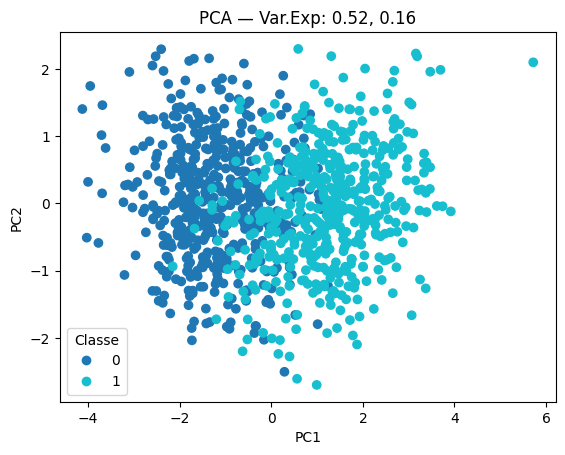

In [6]:
import matplotlib.pyplot as plt

scatter = plt.scatter(Z_global[:, 0], Z_global[:, 1], c=label_class, cmap='tab10')

vr = pca_global.explained_variance_ratio_

plt.title(f'PCA — Var.Exp: {vr[0]:.2f}, {vr[1]:.2f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Classe")

Os dois números representados no título do gráfico 0.52 e 0.16 é o somatório de variância explicado por cada componente principal gerado pelo PCA. Isto pode ser interpretado como: "O PC1 carrega 52% da variância dos dados e o PC2 16%". Dessa forma, significa que ao reduzirmos 3 das 5 dimensões, a quantidade de variância dos dados perdida foi de 32%. A partir de métricas como essa que podemos avaliar quantas dimensões utilizaremos como target no momento de redução da dimensionalidade.

Analisando em 2D as duas classes, A e B, é perceptível que essas possuem dispersões muito parecidas, sendo facilmente confundidas como a mesma classe. Fazendo o exercício de ignonar as cores dos pontos, é muito provável que uma pessoa idenficaria tudo como um cluster só. Além disso, uma linha reta é completamente inviável de ser usada para separar os dois grupos.

Por serem classes de 5 dimensões, mesmo abstraindo três das cinco dimensões, e transformando a visualização dos dados em um plano, é muito difícil a resolução da separação estar presente em funções lineares. Para alcançar uma boa forma de separação desses dados, seria provavelmente necessário o uso de todas as suas dimensões e modelos não lineares, sendo capazes de fazer curvas e se adaptar melhor aos dados. Utilizando como solução um MLP, seria possível alcançarmos essa adaptabilidade dos dados, uma vez que suas camadas ocultas possibilitam construirmos fronteiras de decisão por partes, de modo que lidamos com todas as features das duas classes de forma particionada.

## Explorando um dataset real

Nessa parte final, o desafio foi aplicar o que foi apreendido durante as últimas secções em um dataset elaborado, no caso [**Spaceship Titanic**](https://www.kaggle.com/competitions/spaceship-titanic) do Kaggle. Para esse exercício de exploração, eu fiz o download do dataset e deixei uma pasta separada para os dados. Caso queira reproduzir essa parte do código, é necessário também fazer o download e deixar o arquivo *.csv* no caminho *./documentation.neural_networks/docs/exercises/dados/data*.

In [ ]:
from pathlib import Path
import pandas as pd
import warnings
warnings.simplefilter("ignore", FutureWarning)

BASE_DIR = Path().resolve().parent.parent.parent
DATA_DIR = BASE_DIR / "docs" / "exercises" / "dados" / "data"
titanic_df = pd.read_csv(DATA_DIR / "train.csv")

O dataset **Spaceship Titanic** trata os dados dos passageiros da viagem do Titanic em formato de sátira, onde os passageiros estão em uma viagem espacial e sofrem uma anomalia, causando muitas mortes. A ideia aqui é desafiar as pessoas a explorar os dados dos passageiros da viagem para descobrir quem foram os sobreviventes, com base nas informações de cada um, como por exemplo, nível de cabine, idade, a cidade de destino e etc.

A variável *Transported* referencia se o passageiro morreu ou não, isto é, foi transportado para uma outra dimensão. Dessa forma, caso seja True seu valor, o passageiro morreu no acidente, e o contrário não.

O restantes das variávies indepentes trazem algumas informações como:

- PassengerId: ID do passageiro, com os quatro primeiros dígitos sendo o grupo de pessoas que ele está viajando e os dois últimos o seu id dentro do grupo.
- Name: O nome completo do passageiro.
- HomePlanet: Onde o passageiro mora.
- CryoSleep: Variável booleana se o passageiro escolheu ficar em hibernação durante a viagem. Se sim, isso indica que eles ficaram presos nas suas cabines.
- Cabin: O número da cabine e onde ela está localizada na nave. (Deck/Número do quarto/Lado)
- Destination: O destino do passageiro.
- Age: A idade do passageiro.
- VIP: Variável booleana se o passageiro pagou para ter tratamentos VIPs durante a viagem.
- RoomService: Valores gasto pelo passageiro no serviço de quarto.
- FoodCourt: Valores gasto pelo passageiro no restaurante.
- ShoppingMall: Valores gasto pelo passageiro no shopping da nave.
- Spa: Valores gasto pelo passageiro no Spa.
- VRDeck: Valores gasto pelo passageiro no Deck.

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Com relação a dados faltantes, como todo bom dataset, esse contém algumas colunas com valores *NaN*, mais especificamente 8693 linhas, com todas colunas com valores faltantes, exceto o PassengerId e Transported que são o identificador único do passageiro e a variável dependente. Saber lidar com os dados faltantes do seu dataset muitas vezes é a virada de chave para seu modelo, ou rede neural performar muito bem ou muito ruim, porque em algum casos, a quantidade de de dados faltantes é super relevante e impacta o treinamento do modelo.

Tendo isso em vista, aara lidar com os dados faltantes, é necessário separamos elas entre númericas e categóricas:

**CATEGÓRICAS:**
- HomePlanet
- CryoSleep
- Cabin
- Destination
- VIP
- Name

**NÚMERICAS:**
- Age
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck

Com relação as categóricas, precisaremos analisar caso a caso.

In [9]:
process_titanic_df = titanic_df.copy()

 No caso de *HomePlanet* que representa a origem do passageiro, podemos utilizar a moda como forma de input dos dados faltantes.

In [10]:
process_titanic_df.HomePlanet.fillna(process_titanic_df.HomePlanet.mode()[0], inplace=True)

C:\Users\leand\AppData\Local\Temp\ipykernel_1280\4067918984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  process_titanic_df.HomePlanet.fillna(process_titanic_df.HomePlanet.mode()[0], inplace=True)


Já para o caso da *Cabin*, utilizarei a moda, porém separadas por duas variáveis que acredito serem relevantes para a escolha da ala da nave. A primeira, se a pessoa escolheu viajar hibernando, e a segunda, caso a primeira seja falsa, é se o passageiro é um VIP ou não. A partir disso eu utilizarei a moda dessas separações. Uma coisa importante de pontuar, é que eu vou utilizar a variável de Cabine de uma form diferente, eu vou retirar o número da cabine em si e vou fazer a moda das combinações de (deck/side).

In [11]:
deck_hiberna, side_hiberna = (
    process_titanic_df.query("CryoSleep == True").Cabin.mode()[0].split("/")[0:3:2]
)
deck_VIP, side_VIP = (
    process_titanic_df.query("CryoSleep == False and VIP == True")
    .Cabin.mode()[0]
    .split("/")[0:3:2]
)
deck, side = (
    process_titanic_df.query("CryoSleep == False and VIP == False")
    .Cabin.mode()[0]
    .split("/")[0:3:2]
)


def input_cabin(row):
    if pd.isna(row.Cabin):
        if row.CryoSleep == True:
            return f"{deck_hiberna}/000/{side_hiberna}"
        elif row.VIP == True:
            return f"{deck_VIP}/000/{side_VIP}"
        else:
            return f"{deck}/000/{side}"
    return row.Cabin


process_titanic_df.Cabin = process_titanic_df.apply(input_cabin, axis=1)

process_titanic_df = process_titanic_df.assign(
    Deck=lambda df: df.Cabin.apply(lambda linha: linha.split("/")[0]),
    Side=lambda df: df.Cabin.apply(lambda linha: linha.split("/")[-1]),
).drop(["Cabin"], axis=1)

Para *Destination* eu utilizarei a mesma técnicas usada para *HomePlanet*, aplicando apenas a moda.

In [12]:
process_titanic_df.Destination.fillna(process_titanic_df.Destination.mode()[0], inplace=True)

C:\Users\leand\AppData\Local\Temp\ipykernel_1280\2670885131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  process_titanic_df.Destination.fillna(process_titanic_df.Destination.mode()[0], inplace=True)


Para a variável *VIP*, utilizarei a mesma ideia de *Cabin*, pegando a mediana do grupo de passageiros VIPs e não VIPs e a partir dos gastos dos passageiros sem rótulo de VIP, eu aplicarei eles a mediana mais próxima.

In [13]:
medianas_VIP = (
    process_titanic_df
    .assign(
        RoomService=lambda df: df.RoomService.fillna(0),
        FoodCourt=lambda df: df.FoodCourt.fillna(0),
        ShoppingMall=lambda df: df.ShoppingMall.fillna(0),
        Spa=lambda df: df.Spa.fillna(0),
        VRDeck=lambda df: df.VRDeck.fillna(0),
        total_amount=lambda df: df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa + df.VRDeck
    )
    .query("VIP.notnull()")
    .groupby("VIP")["total_amount"]
    .median()
    .to_dict()
)

process_titanic_df.VIP = process_titanic_df.assign(
    RoomService=lambda df: df.RoomService.fillna(0),
    FoodCourt=lambda df: df.FoodCourt.fillna(0),
    ShoppingMall=lambda df: df.ShoppingMall.fillna(0),
    Spa=lambda df: df.Spa.fillna(0),
    VRDeck=lambda df: df.VRDeck.fillna(0),
    total_amount=lambda df: df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa + df.VRDeck,
    diff_vip_true=lambda df: (df.total_amount - medianas_VIP[True]).abs(),
    diff_vip_false=lambda df: (df.total_amount - medianas_VIP[False]).abs(),
    VIP=lambda df: df.VIP.where(
        df.VIP.notna(),  # mantém os já preenchidos
        df.diff_vip_true < df.diff_vip_false  # preenche os NaN
    )
).VIP

No caso de *CryoSleep* que é a booleana referente ao passageiro que optou por ficar em hibernação durante a viagem, essa é uma varíavel passível de ser predita a partir das outras variáveis como por exemplo os gastos nos estabelecimentos. No entanto, por questões de simplificação, utilizarei apenas a moda como forma de input.

In [14]:
process_titanic_df.CryoSleep.fillna(process_titanic_df.CryoSleep.mode()[0], inplace=True)

C:\Users\leand\AppData\Local\Temp\ipykernel_1280\56447100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  process_titanic_df.CryoSleep.fillna(process_titanic_df.CryoSleep.mode()[0], inplace=True)
C:\Users\leand\AppData\Local\Temp\ipykernel_1280\56447100.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pr

 E por fim, as variáveis Nome e PassengerID, por serem varíaveis identificadoras dos indivíduos, não serão usadas, para não criar um viés na rede.

In [15]:
process_titanic_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

Já sobre as númericas, a variável *Age* será preenchida com a mediana dos passageiros, por ser a forma mais estável e que traz, em teoria, menos viés para a rede.

In [16]:
process_titanic_df.Age = process_titanic_df.Age.fillna(process_titanic_df.Age.median())

 Já as variáveis de gasto nos estabelecimentos: RoomService; FoodCourt; ShoppingMall; Spa; VRDeck, serão preenchidas com a seguinte regra. Se a pessoa tem a variável *CryoSleep* igual a True, todo valor faltantes será preenchido com zero, afinal, ela estava hibernando e não gastou nada.  Agora já aqueles passageiros com *CryoSleep* igual a False, ou com essa variável, também com o dado faltante, os gastos serão preenchidos com base na média dos gastos nos outros estabelecimentos, afinal, não tem nenhum passageiro com todas as variáveis de consumo vazias ao mesmo tempo.

In [ ]:
col_consumo = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

hiberna_true = process_titanic_df['CryoSleep'] == True
process_titanic_df.loc[hiberna_true, col_consumo] = process_titanic_df.loc[hiberna_true, col_consumo].fillna(0)

def fill_row_expenses(row):
    row[col_consumo] = row[col_consumo].fillna(row[col_consumo].mean())
    return row

process_titanic_df.loc[~hiberna_true] = process_titanic_df.loc[~hiberna_true].apply(fill_row_expenses, axis=1)

C:\Users\leand\AppData\Local\Temp\ipykernel_1280\3890081662.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  row[col_consumo] = row[col_consumo].fillna(row[col_consumo].mean())
C:\Users\leand\AppData\Local\Temp\ipykernel_1280\3890081662.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  row[col_consumo] = row[col_consumo].fillna(row[col_consumo].mean())
C:\Users\leand\AppData\Local\Temp\ipykernel_1280\3890081662.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call resu

In [18]:
y = process_titanic_df["Transported"].astype(int)
X = process_titanic_df.drop(columns=["Transported", "PassengerId", "Name"], errors="ignore")

In [19]:
categoricas = X.select_dtypes(include=["object", "bool"]).columns.tolist()
numericas = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

In [20]:
X = pd.get_dummies(X, columns=categoricas, drop_first=True)

In [21]:
def normaliza_numerica(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    df_copy = df.copy()
    
    for col in cols:
        min_val = df_copy[col].min()
        max_val = df_copy[col].max()

        df_copy[col] = 2 * (df_copy[col] - min_val) / (max_val - min_val) - 1
    
    return df_copy

Aqui novamente, assim como aplicamos a normalização nos exemplos anteriores, aplicaremos para todas as variáveis númericas, justamente por estarmos simulando que o dataset seria inputado em uma rede neural posteriormente. Rede neural essa que possui como função de ativação a `tanh(x)`, cuja suas maiores derivadas estão concentradas entre $[-1, 1]$, logo, aqui eu não apliquei a normalização apresentada anteriormente, buscando uma distribuição de média 0 e desvio padrão. Nesse caso eu apliquei a normalização, minmax de segundo grau, que busca justamente a diposição $[-1, 1]$, expressa por:

$$
x'' = 2 \cdot \frac{x - \min}{\max - \min} - 1
$$

In [22]:
X = normaliza_numerica(X, numericas)

Podemos entender o efeito dessa normalização a partir de histogramas como:

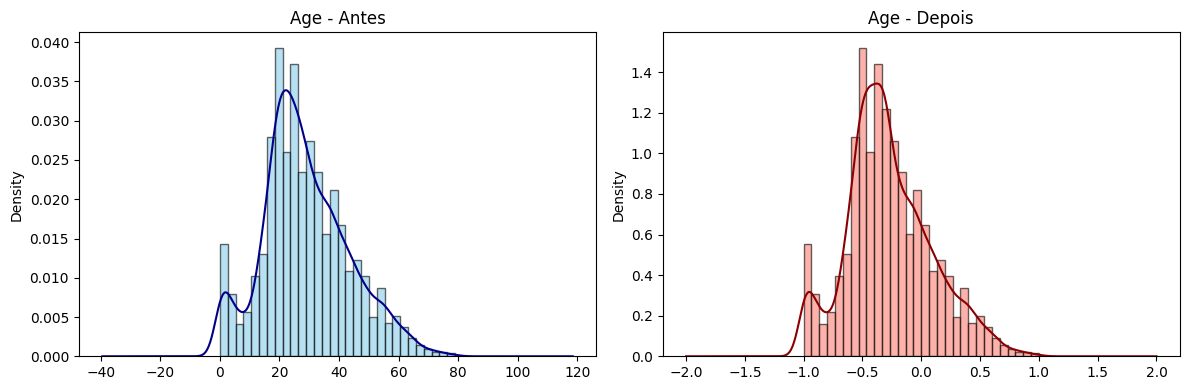

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(titanic_df["Age"], bins=30, color="skyblue", edgecolor="black", alpha=0.6, density=True)
titanic_df["Age"].plot(kind="kde", ax=axes[0], color="darkblue")
axes[0].set_title("Age - Antes")

axes[1].hist(X["Age"], bins=30, color="salmon", edgecolor="black", alpha=0.6, density=True)
X["Age"].plot(kind="kde", ax=axes[1], color="darkred")
axes[1].set_title("Age - Depois")

plt.tight_layout()
plt.show()

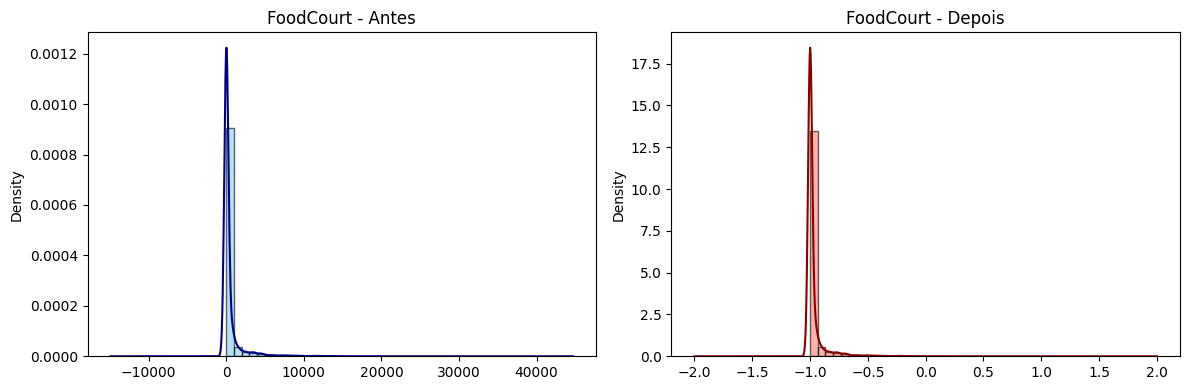

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(titanic_df["FoodCourt"], bins=30, color="skyblue", edgecolor="black", alpha=0.6, density=True)
titanic_df["FoodCourt"].plot(kind="kde", ax=axes[0], color="darkblue")
axes[0].set_title("FoodCourt - Antes")

axes[1].hist(X["FoodCourt"], bins=30, color="salmon", edgecolor="black", alpha=0.6, density=True)
X["FoodCourt"].plot(kind="kde", ax=axes[1], color="darkred")
axes[1].set_title("FoodCourt - Depois")

plt.tight_layout()
plt.show()

Como é possível ver nos dois casos, não afetamos a distribuição dos dados aplicando a normalização, apenas alteramos as escalas das variáveis o que evita com que números muito grandes ou desbalanceados causem saturação nos neurônios por conta da derivada da função `tanh(x)` ser quase 0, o que prejudica o aprendizado. De modo geral, a noramlização estabiliza o treinamento, melhora a convergência do gradiente e ajuda a rede a aproveitar melhor a simetria da tanh em torno de zero, resultando em pesos mais bem distribuídos e em uma performance mais consistente.